# King County Housing Data Project
---
Student name: T.J. Kyner \
Student pace: Full time \
Instructor name: Abhineet Kulkarni \
Cohort: 040521

## Business Problem
---
The ability to accurately appraise a house is of critical importance for a variety of stakeholders. In addition to buyers and sellers, which each have their own interests in finding the fair market price of a house, other entities such as municipalities benefit from such insight as well. Given that property taxes provide the vast majority of tax revenue for municipalities, having an accurate prediction model for house prices can play a key role in efficient financial planning and budgeting. The goal of this project is to provide such a prediction model for the benefit of municipalities in King County, Washington. 

## Imports & Settings
---

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Setting the default styling theme for seaborn:

In [40]:
sns.set_theme()

The following code forces tables written in Markdown to be aligned to the left of the cell instead of the center which is the default:

In [10]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

Pulling in the data to a DataFrame:

In [4]:
df = pd.read_csv('data/kc_house_data.csv')

## Exploratory Data Analysis
---

### Summary Statistics and Information
To start, I'll print the first five rows of the dataframe to get a quick feel for the information available.

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


While most of the 21 columns of data available are fairly self|explanatory, some require a bit more explanation. Along with the original dataset, some metadata on the column names was also provided. Brief descriptions of each column are as follows:

| Column | Description |
| ------ | ----------- |
| `id` | unique identified for a house|
| `date` | house was sold |
| `price` |  is prediction target |
| `bedrooms` |  of Bedrooms/House |
| `bathrooms` |  of bathrooms/bedrooms |
| `sqft_living` |  footage of the home |
| `sqft_lot` |  footage of the lot |
| `floors` |  floors (levels) in house |
| `waterfront` | House which has a view to a waterfront |
| `view` | Has been viewed |
| `condition` | How good the condition is (Overall) |
| `grade` | overall grade given to the housing unit, based on King County grading system |
| `sqft_above` | square footage of house apart from basement |
| `sqft_basement` | square footage of the basement |
| `yr_built` | Built Year |
| `yr_renovated` | Year when house was renovated |
| `zipcode` | zip |
| `lat` | Latitude coordinate |
| `long` | Longitude coordinate |
| `sqft_living15` | The square footage of interior housing living space for the nearest 15 neighbors |
| `sqft_lot15` | The square footage of the land lots of the nearest 15 neighbors |

Expanded definitions for certain columns, such as `condition` and `grade`, can be found within King County's [Residential Glossary of Terms](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r).

While most of the provided descriptions seem logical, I do have a concern regarding the `view` column. It seems more logical for this column to be referring to some sort of grading scale for the view available from the house rather than if it has been "viewed" (by whom? for what purpose?). This idea is further supported by "Views" being defined in King County's [Condo Glossary of Terms](https://info.kingcounty.gov/assessor/esales/Glossary.aspx#views) as follows:
> For each classification will display blank for no view or "Fair", "Average", "Good" or "Excellent" to reflect the quality of view for that unit

Next, I'll take a look at the datatypes for each column by calling the `.info()` method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Observations:**
- The `date` column is stored as a string instead of a datetime object.
- The `sqft_basement` column is stored as a string instead of an integer like all other columns regarding square footage.
- The `yr_renovated` column is stored as a float and should be converted to an integer since it is referring to a year.
- The `view`, `condition`, `grade`, and `zipcode` columns represent categorical data. These will need to be dealt with accordingly.

In addition to the above observations, it appears that some columns were missing data. Viewing this in an easier to digest manner yields the following:

In [21]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [24]:
print('Total rows:', df.shape[0])

Total rows: 21597


It appears that the `waterfront` and `yr_renovated` columns have a decent amount of values missing with the `view` column missing a negligible amount.

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Observations:**
- There appears to be an outlier with regard to `bedrooms` - the 75th percentile value is 4 bedrooms while the max is 33. This row may possibly need removed.
- The `yr_renovated` column appears to have a large number of `0` values which doesn't make sense given the context. This will be further explored with the `.value_counts()` method.

### Value Counts
While I already checked the number of missing values in each column, that does not always paint the full picture. As noted above, the `0` values in the `yr_renovated` column are one such instance where the values may not be missing but are nonetheless innaccurate and simply placeholders. Below, I'll loop over the top five values by frequency for each column as a way to check for any additional placeholder values that may not be readily apparent through summary statistics.

In [27]:
for col in df.columns:
    print('--- ', col.upper(), ' ---')
    print(df[col].value_counts(normalize=True).head(), '\n\n')

---  ID  ---
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


---  DATE  ---
6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


---  PRICE  ---
350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


---  BEDROOMS  ---
3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


---  BATHROOMS  ---
2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


---  SQFT_LIVING  ---
1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


---  SQFT_LOT  ---
5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: flo

**Observations:**
- Over 99% of houses are not specified as a waterfront property.
- Over 90% of houses do not have a view that warrants a grade.
- Around 2% of houses have `?` as a value for `sqft_basement` which appears to be a placeholder value. These will need to be dealt with but the existence of such a placeholder value bolsters confidence in the nearly 60% of homes with a value of `0.0`  for `sqft_basement` meaning that they truly have no basement (versus `0.0` also potentially being a placeholder value).
- Over 95% of houses have a `yr_renovated` value of `0.0`. As mentioned previously, the context indicates that this is meant as a placeholder value. Combined with the fact that this column has the largest amount of missing data, I will likely be dropping it.

### Basic Visualizations
Plotting each of the columns against `price` will allow me to quickly see which features are most correlated with the value of a house.

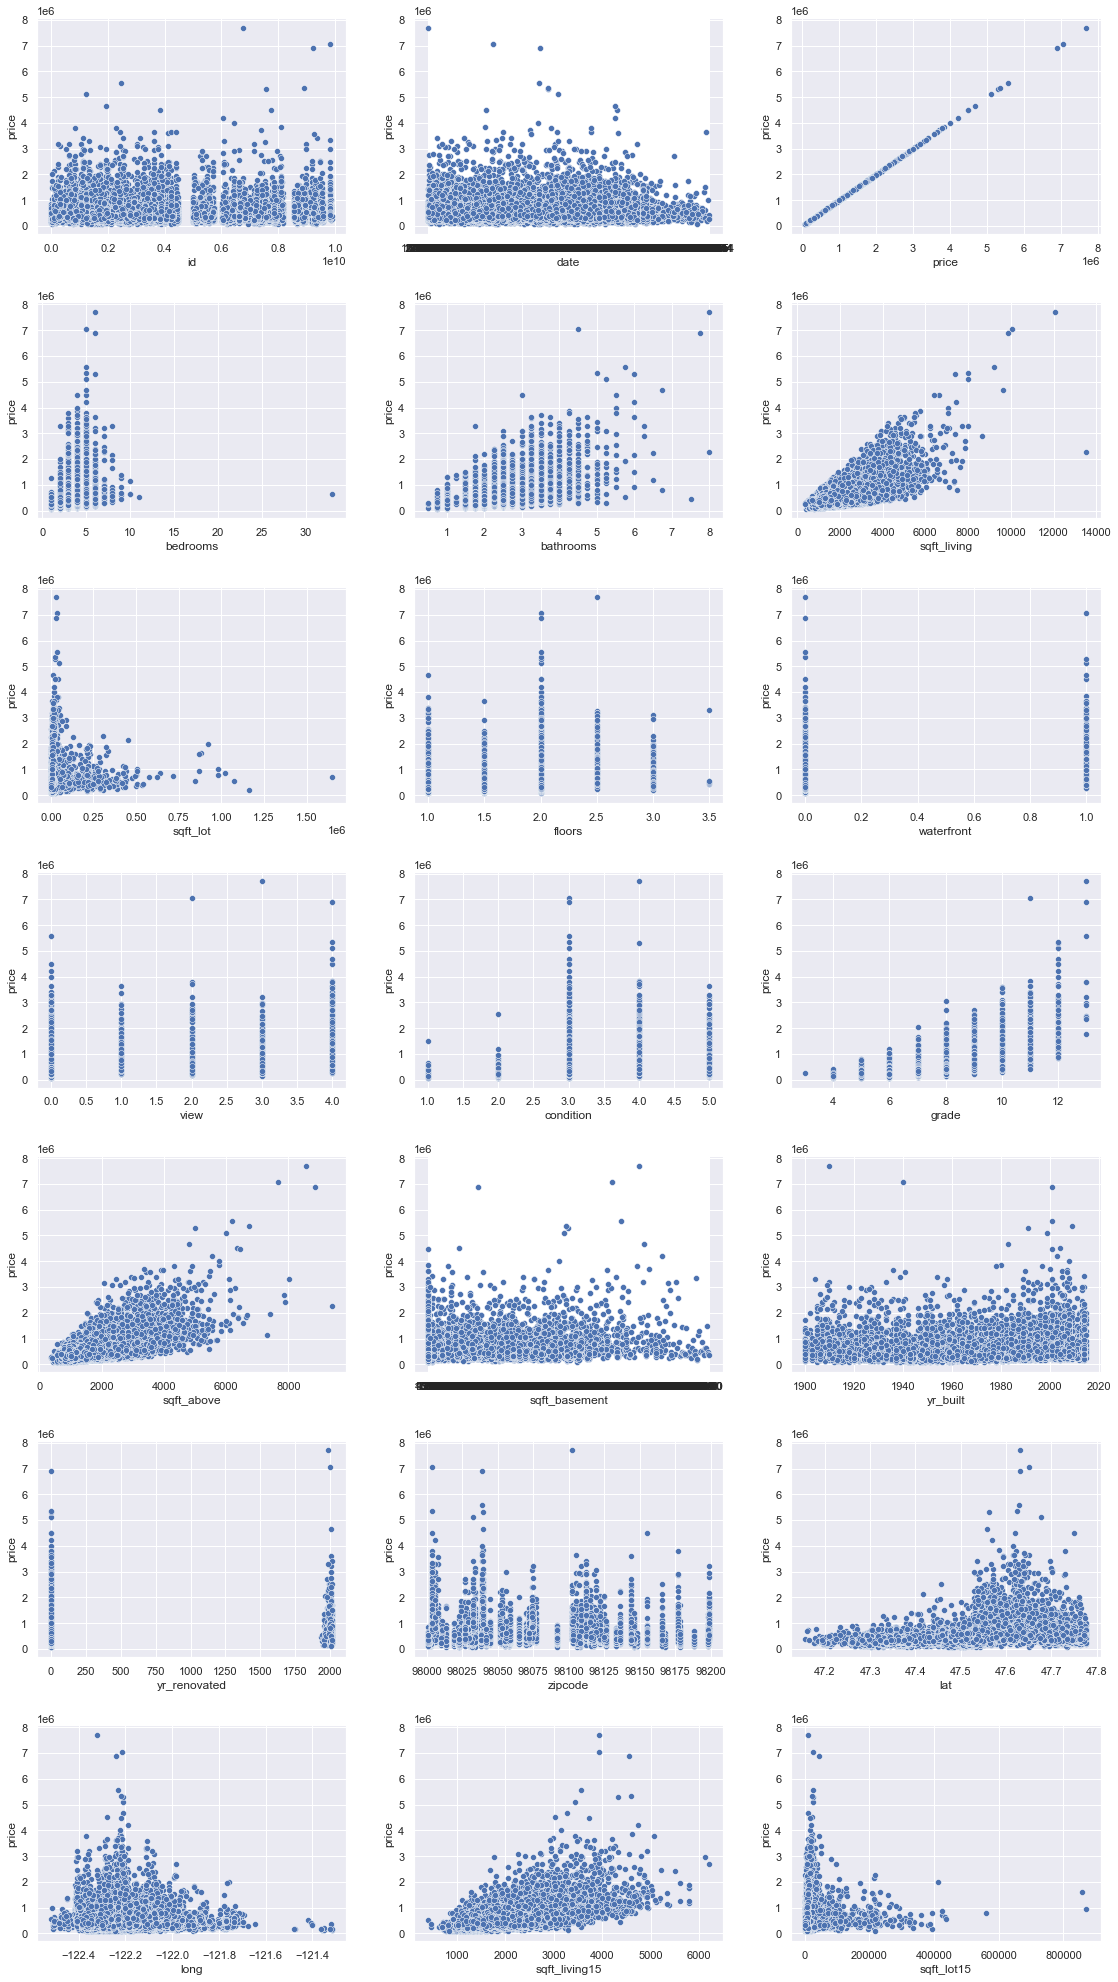

In [45]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(16, 28))
# Reshaping axes to a 1-D object for easier iteration
axes = axes.reshape(-1)

for i, col in enumerate(df.columns):
    sns.scatterplot(x=col, y='price', data=df, ax=axes[i])

# Increasing the padding around each subplot for enhanced clarity
fig.tight_layout(pad=2.0);

**Observations:**
- Unsurprisingly, the size of the home appears to be strongly correlated with `price`.
- Interestingly, houses with the highest `condition` do not seem to fetch higher average prices than those closer to the middle of the scale. 
- Both `waterfront` and `view` appear to have no correlation with `price`.

Next, I'll visualize the actual correlation values via a heatmap:

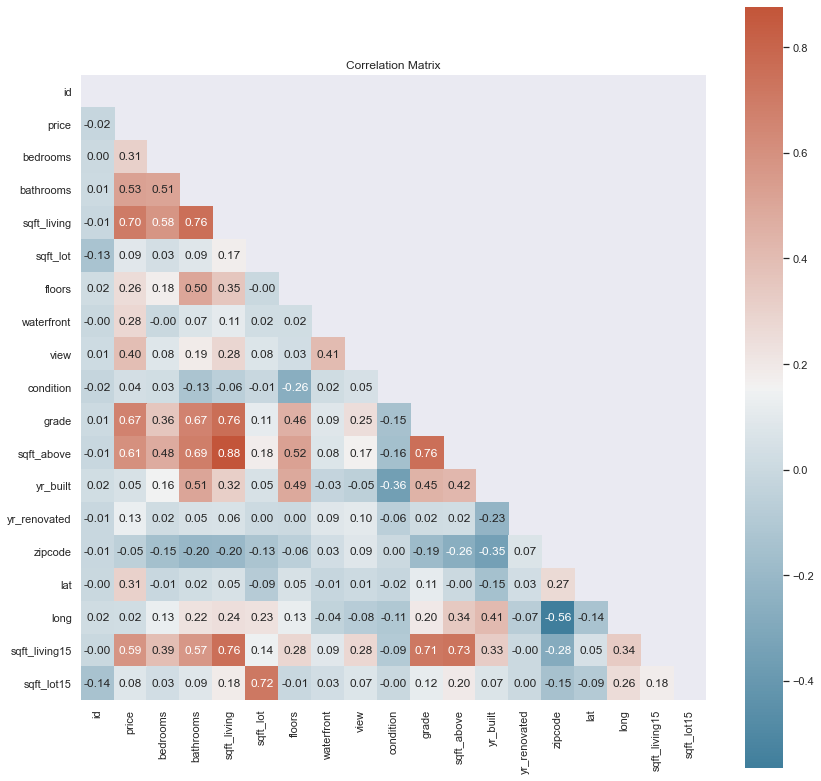

In [62]:
plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(df.corr()))

# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap);

**Observations:**
- Several columns are highly correlated with one another which will lead to multicollinearity issues in the regression models. This will need to be addressed.

## Data Preprocessing
---

## Modeling
---

## Conclusion
---
### Results
### Next Steps